In [1]:
import R4_3

In [2]:
import math

In [3]:
import pandas as pd

In [4]:
import string

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from R4_3 import Requirement4_3

### 实验数据:
    # 根据需求输入想得到的test_lot相关数据
    test_lot = "LXT2128N008-D001.002"
    
    # 随意找两个lot作为FF/SS
    FF = "ESP32-U4WDH-ATUE00_PPG146-MTK#11#MAP_ESP2128003FL000"
    SS = "ESP32-D0WD-V3-ATUE00_PAR244.00-MTK#B_ESP2125005BK000"
    

### 数据概览：

In [8]:
R4_3 = Requirement4_3("LXT2128N008-D001.002")
data = R4_3.main_function(False)
df = pd.DataFrame(data)
df = df.rename(columns={'_id':'test_name'})
df

,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
0,rf_result_,32003,0.052404,42287,0.000000,1.000000,0.222840,0.000000,0.000000,0.0
1,rf_dig_,32002,0.003688,42299,0.000000,15.000000,0.229269,0.000000,0.000000,0.0
2,DET_Test_VDET,100,0.453017,49707,0.099792,1.008682,0.350077,0.120000,0.080000,0.015661
3,efuse_bad_,17013,0.076319,46961,0.000000,512.000000,6.250546,0.000000,0.000000,0.0
4,OS_test_N_SD_DATA_0_data,13006,-0.348947,49707,-1.735382,-0.024490,0.087623,-0.200000,-0.900000,-0.064614
...,...,...,...,...,...,...,...,...,...,...
92,scan_ac_cpu_240_ft_,33001,0.078436,40071,0.000000,1.000000,0.268856,1.000000,0.000000,0.589691
93,DeepSleep_IO_Current_IO_VDD,26011,0.000005,42458,0.000003,0.000201,0.000002,0.000007,-0.000005,N/A
94,GPIO26_data_1_DAC_Test_GPIO26_data,28007,3.158562,45281,3.006134,3.233185,0.023313,3.300000,3.060000,0.505934
95,OS_test_N_SD_CMD_data,13002,-0.342626,49707,-1.732635,-0.024033,0.047741,-0.200000,-0.900000,-2.317653


### FF and SS:

这里任意先选择了两个lot作为FF and SS 

In [9]:
FF = Requirement4_3("ESP32-U4WDH-ATUE00_PPG146-MTK#11#MAP_ESP2128003FL000")
FF_data = FF.main_function(False)
FF_df = pd.DataFrame(FF_data)
FF_df = FF_df.rename(columns={'_id':'test_name'})
FF_df

,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
0,sram1_fail106_h_,12400,3071.625000,16,0.0,8191.000000,3965.450824,65535.003906,0.0,2.398822
1,sram1_fail126_h_,12800,2730.333333,12,0.0,8191.000000,3861.274430,65535.003906,0.0,2.49536
2,sram1_fail13_h_,10540,2711.155518,90,0.0,8191.000000,3420.775644,65535.003906,0.0,2.771219
3,chip_id_half_part1,30060,1612.842155,48687,0.0,4094.999756,92.045807,1099511627776.0,0.0,-3823205532.565166
4,sram1_fail65_h_,11580,3007.374878,16,0.0,8189.999512,3885.305582,65535.003906,0.0,2.448566
...,...,...,...,...,...,...,...,...,...,...
383,already_burned_PVT_6_DIG,30170,0.000000,48592,0.0,0.000000,0.000000,255.0,0.0,N/A
384,efuse_record,30100,0.020895,48671,0.0,12.000000,0.496660,100.0,0.0,33.319477
385,sram1_fail49_h_,11260,2561.374878,16,0.0,8189.999512,3510.117072,65535.003906,0.0,2.733276
386,sram1_fail51_h_,11300,2561.374878,16,0.0,8189.999512,3510.117072,65535.003906,0.0,2.733276


In [10]:
SS = Requirement4_3("ESP32-D0WD-V3-ATUE00_PAR244.00-MTK#B_ESP2125005BK000")
SS_data = SS.main_function(False)
SS_df = pd.DataFrame(FF_data)
SS_df = FF_df.rename(columns={'_id':'test_name'})
SS_df

,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
0,sram1_fail106_h_,12400,3071.625000,16,0.0,8191.000000,3965.450824,65535.003906,0.0,2.398822
1,sram1_fail126_h_,12800,2730.333333,12,0.0,8191.000000,3861.274430,65535.003906,0.0,2.49536
2,sram1_fail13_h_,10540,2711.155518,90,0.0,8191.000000,3420.775644,65535.003906,0.0,2.771219
3,chip_id_half_part1,30060,1612.842155,48687,0.0,4094.999756,92.045807,1099511627776.0,0.0,-3823205532.565166
4,sram1_fail65_h_,11580,3007.374878,16,0.0,8189.999512,3885.305582,65535.003906,0.0,2.448566
...,...,...,...,...,...,...,...,...,...,...
383,already_burned_PVT_6_DIG,30170,0.000000,48592,0.0,0.000000,0.000000,255.0,0.0,N/A
384,efuse_record,30100,0.020895,48671,0.0,12.000000,0.496660,100.0,0.0,33.319477
385,sram1_fail49_h_,11260,2561.374878,16,0.0,8189.999512,3510.117072,65535.003906,0.0,2.733276
386,sram1_fail51_h_,11300,2561.374878,16,0.0,8189.999512,3510.117072,65535.003906,0.0,2.733276


### 查看标准差为0的测试项数据：

    目前还不清楚数据是否有其他--异常--

In [11]:
df[(df.standard_deviation == 0)]

,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
26,reburn_switch_,29000,0.0,42383,0.0,0.0,0.0,0.0,0.0,N/A
30,already_burned_filter_240M_,17011,1.0,46961,1.0,1.0,0.0,255.0,0.0,N/A
53,already_burned_Non_240M_,17010,0.0,46961,0.0,0.0,0.0,255.0,0.0,N/A
66,already_burned_adc_,17009,1.0,46961,1.0,1.0,0.0,255.0,0.0,N/A


### 得到标准差非0数据：

In [12]:
df = df[(df.standard_deviation != 0)]
df

,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
0,rf_result_,32003,0.052404,42287,0.000000,1.000000,0.222840,0.000000,0.000000,0.0
1,rf_dig_,32002,0.003688,42299,0.000000,15.000000,0.229269,0.000000,0.000000,0.0
2,DET_Test_VDET,100,0.453017,49707,0.099792,1.008682,0.350077,0.120000,0.080000,0.015661
3,efuse_bad_,17013,0.076319,46961,0.000000,512.000000,6.250546,0.000000,0.000000,0.0
4,OS_test_N_SD_DATA_0_data,13006,-0.348947,49707,-1.735382,-0.024490,0.087623,-0.200000,-0.900000,-0.064614
...,...,...,...,...,...,...,...,...,...,...
92,scan_ac_cpu_240_ft_,33001,0.078436,40071,0.000000,1.000000,0.268856,1.000000,0.000000,0.589691
93,DeepSleep_IO_Current_IO_VDD,26011,0.000005,42458,0.000003,0.000201,0.000002,0.000007,-0.000005,N/A
94,GPIO26_data_1_DAC_Test_GPIO26_data,28007,3.158562,45281,3.006134,3.233185,0.023313,3.300000,3.060000,0.505934
95,OS_test_N_SD_CMD_data,13002,-0.342626,49707,-1.732635,-0.024033,0.047741,-0.200000,-0.900000,-2.317653


In [13]:
FF_df = FF_df[(FF_df.standard_deviation != 0)]
SS_df = SS_df[(SS_df.standard_deviation != 0)]

# 作图：

In [14]:
test_res = R4_3.get_data_for_plot()
df2 = pd.DataFrame(test_res)
df2

,Counter,test_name,test_num,value
0,1,MACID_Low_cal_read_,16004,6.454428e+06
1,1,chip_id_part0_,17002,6.374032e+06
2,1,chip_id_part0_,17002,6.421716e+06
3,3,DeepSleep_ANA_Current_ANA_VDD,26010,1.007095e-06
4,2,chip_id_part0_,17002,6.456636e+06
...,...,...,...,...
82848,1,chip_id_part0_,17002,6.365580e+06
82849,1,LightSleep_IO_Current_IO_VDD,26003,3.713664e-03
82850,1,OS_test_N_SD_CMD_data,13002,-2.469635e-01
82851,1,MACID_Low_cal_read_,16004,6.429100e+06


1. 通过修改编号 查询想要的测试项名称：

In [15]:
test_num = input("input test_num to check test_name: ")
df2[df2.test_num==str(test_num)]
# 实验数据： 28004： GPIO25_data_0_DAC_Test_GPIO25_data

input test_num to check test_name: 


,Counter,test_name,test_num,value


或 批量查询 测试项名称：

In [16]:
grouped = df2.loc[0:,["test_name","test_num"]]
grouped = df2.groupby(["test_name","test_num"])
# 修改 下面数值， 批量查看测试项名称
grouped.first()[0:15]

,,Counter,value
test_name,test_num,,
Cal_crc_Result_,16002,47104,1.000000
Cal_id_burned_Result_,16001,1,218.000000
Chip_PowerDown_IDD_ANA_Current_ANA_VDD,26014,2,0.000007
Chip_PowerDown_IDD_IO_Current_IO_VDD,26015,2,0.000006
DET_Test_VDET,100,4556,1.007996
DS_WakeUp_ANA_Current_ANA_VDD,26012,799,0.004936
DS_WakeUp_IO_Current_IO_VDD,26013,7,0.015034
DeepSleep_ANA_Current_ANA_VDD,26010,3,0.000001
DeepSleep_IO_Current_IO_VDD,26011,165,0.000005


# 输入要查的测试项具体名称：

In [17]:
a_test_res = input("input the test_item_name: ")
# 输入想查询的 测试项名称



input the test_item_name: GPIO25_data_0_DAC_Test_GPIO25_data


3. 预览部分数据

In [20]:
data_for_the_test_item = df2[(df2.test_name == a_test_res)]
data_for_the_test_item

,Counter,test_name,test_num,value
10,3,GPIO25_data_0_DAC_Test_GPIO25_data,28004,1.824188
107,1,GPIO25_data_0_DAC_Test_GPIO25_data,28004,2.119904
184,1,GPIO25_data_0_DAC_Test_GPIO25_data,28004,2.004318
187,2,GPIO25_data_0_DAC_Test_GPIO25_data,28004,1.893539
225,1,GPIO25_data_0_DAC_Test_GPIO25_data,28004,1.907272
...,...,...,...,...
82630,1,GPIO25_data_0_DAC_Test_GPIO25_data,28004,1.923981
82730,12,GPIO25_data_0_DAC_Test_GPIO25_data,28004,0.137100
82741,2,GPIO25_data_0_DAC_Test_GPIO25_data,28004,1.950073
82825,196,GPIO25_data_0_DAC_Test_GPIO25_data,28004,0.097504


In [21]:

data_for_the_test_item2 = df[(df.test_name == a_test_res)]
data_for_the_test_item2 = data_for_the_test_item2.reset_index(drop=True)
# data_for_the_test_item2
high_limit = round(data_for_the_test_item2.loc[0,'high_limit'],4)
low_limit = round(data_for_the_test_item2.loc[0,'low_limit'],4)
print(" high_limit: " , high_limit, "\n", "low_limit: ", low_limit)
data_for_the_test_item2

 high_limit:  0.2 
 low_limit:  0.0


,test_name,test_num,mean,count,min,max,standard_deviation,high_limit,low_limit,CPK
0,GPIO25_data_0_DAC_Test_GPIO25_data,28004,0.126101,46795,0.035019,3.173676,0.250086,0.2,0.0,0.12208


## 柱形图：

### 小范围：

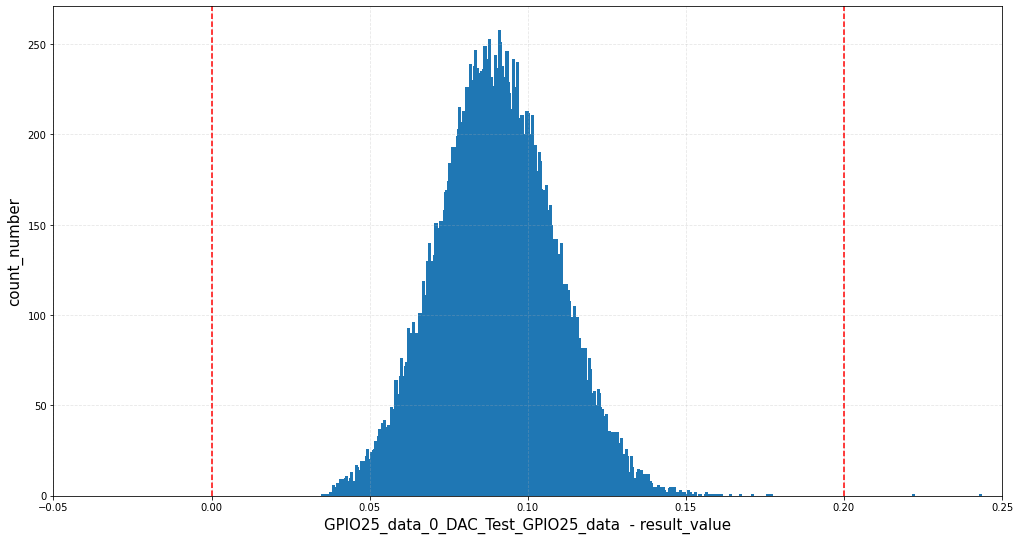

In [22]:
x_values = data_for_the_test_item.value
y_values = data_for_the_test_item.Counter
plt.figure(figsize=(17,9))
plt.xlabel(a_test_res+"  - result_value", fontsize = 15)
plt.ylabel("count_number",fontsize = 15)

plt.xlim((low_limit-0.05),(high_limit+0.05),0.00015)

plt.grid(True, linestyle='--', alpha=0.3)
plt.axvline(x=low_limit, c='r', ls = "--")
plt.axvline(x=high_limit, c='r', ls = "--")
plt.bar(x_values, y_values, width=0.001)


plt.show()

### 包含最大值最小值的全范围 （不保证没有噪点）

<BarContainer object of 1184 artists>

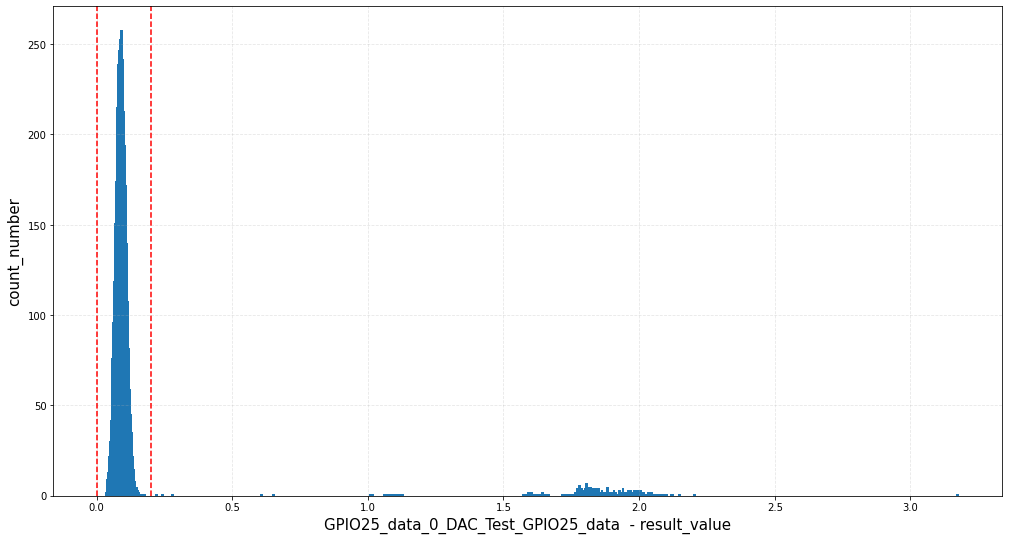

In [23]:
x_values = data_for_the_test_item.value
y_values = data_for_the_test_item.Counter
plt.figure(figsize=(17,9))
plt.xlabel(a_test_res+"  - result_value", fontsize = 15)
plt.ylabel("count_number",fontsize = 15)
plt.axvline(x=low_limit, c='r', ls = "--")
plt.axvline(x=high_limit, c='r', ls = "--")
plt.grid(True, linestyle='--', alpha=0.3)
plt.bar(x_values, y_values,width=0.01)

## 频布直方图：

In [24]:
minmum = math.floor(min(x_values))
minmum

0

In [25]:
maxmum = math.ceil(max(x_values)) 
maxmum

4

In [26]:
x_values

10       1.824188
107      2.119904
184      2.004318
187      1.893539
225      1.907272
           ...   
82630    1.923981
82730    0.137100
82741    1.950073
82825    0.097504
82835    1.993790
Name: value, Length: 1184, dtype: float64

In [27]:
y_values

10         3
107        1
184        1
187        2
225        1
        ... 
82630      1
82730     12
82741      2
82825    196
82835      3
Name: Counter, Length: 1184, dtype: int64

In [28]:
# 在x_value中储存着测试项的值， 在y_value中储存则测试项这个值的数量， 
# 在后面的频布直方图中，我们不用统计每个值的数量，需要一个拥有所有值的list

x_value_list = list(x_values)
y_value_list = list(y_values)
hist_x_value = []
for i in range(len(x_value_list)):
    count_number = y_value_list[i]
    value = x_value_list[i]
    for j in range(count_number):
        hist_x_value.append(value)

len(hist_x_value)

46795

In [29]:
xticks = list(range(10*minmum,10*maxmum,1))
for i in range(len(xticks)):
    xticks[i] = xticks[i]/10


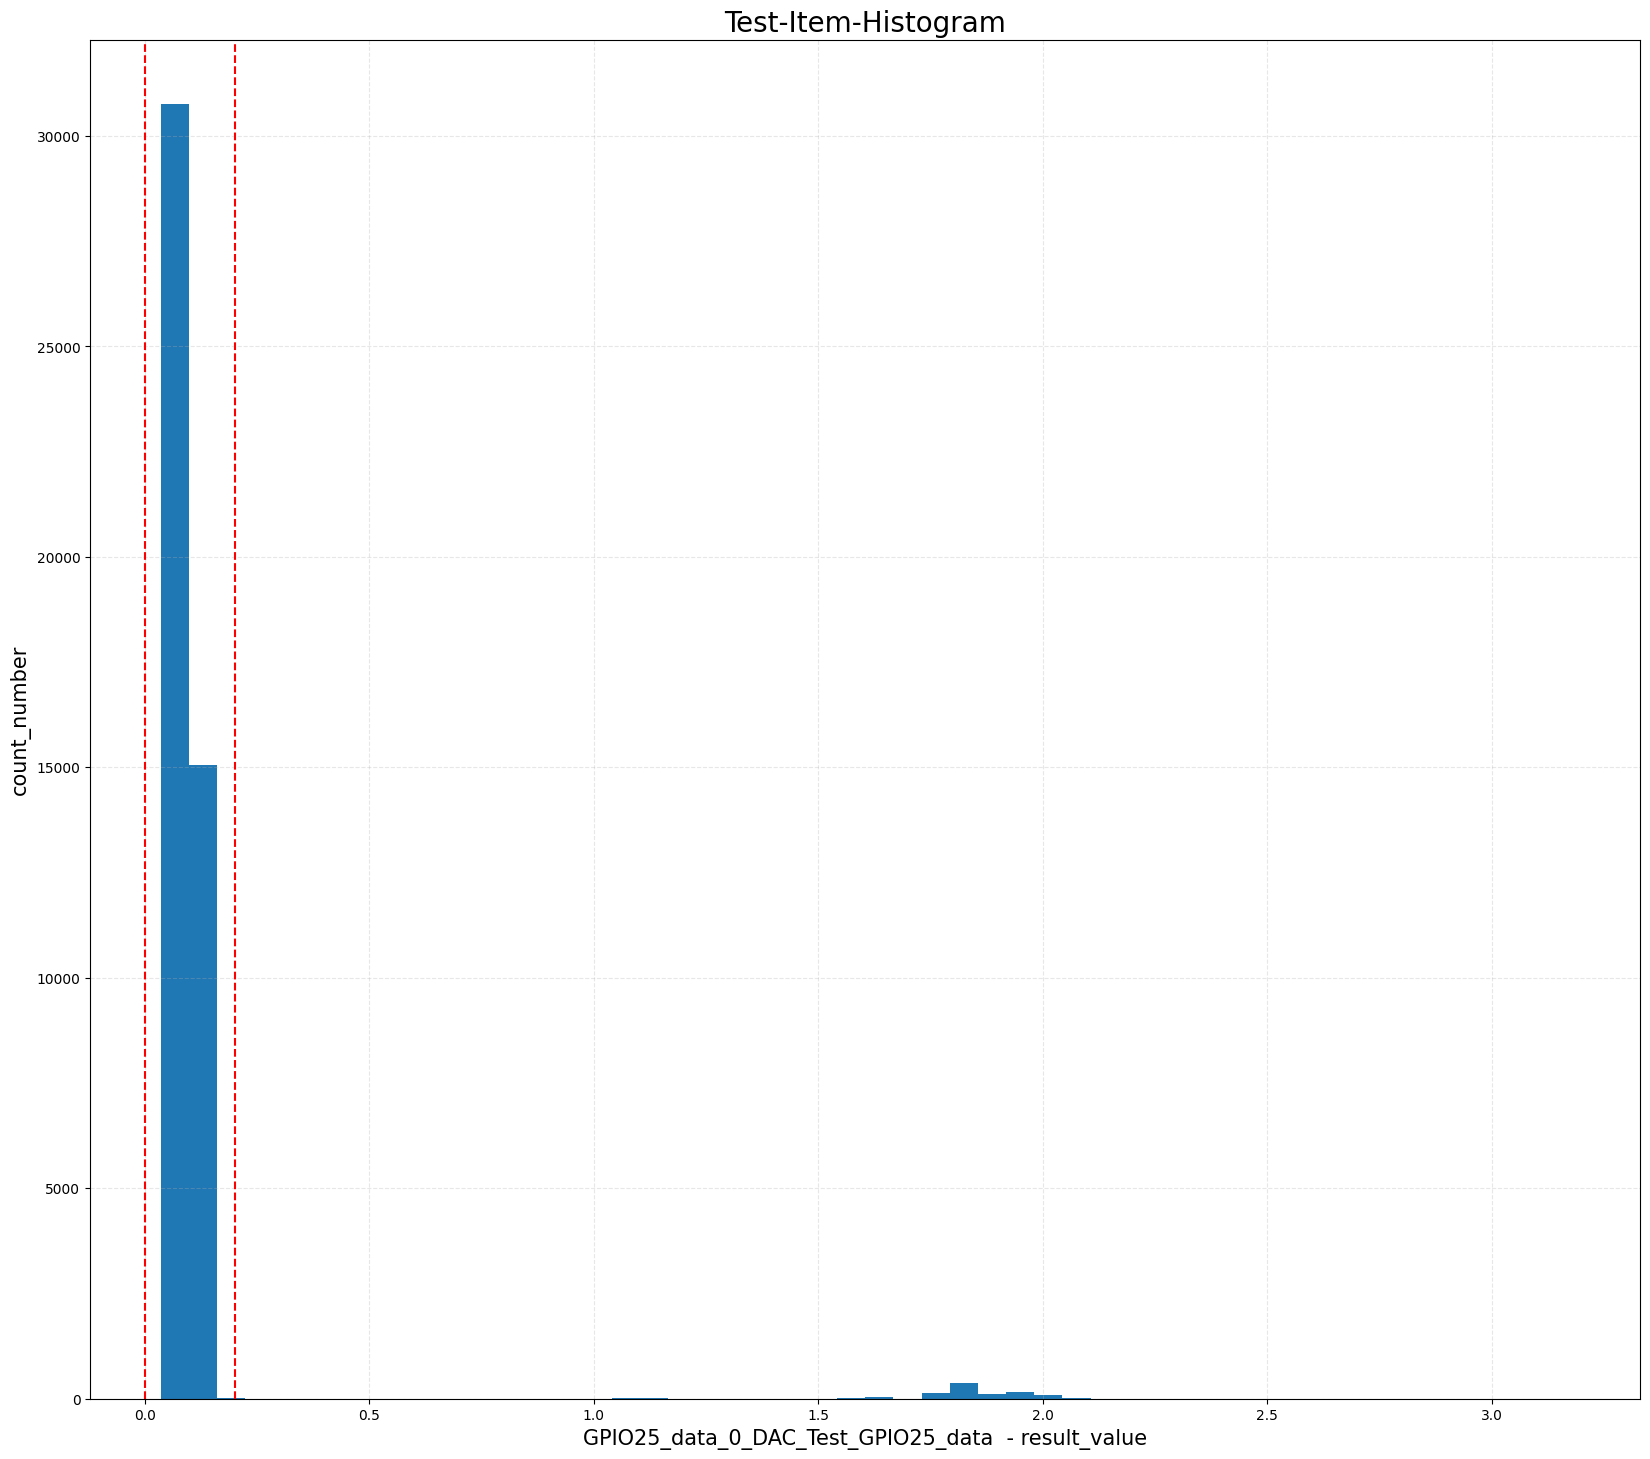

In [30]:
plt.figure(figsize=(20,18), dpi=100)
interval = 0.02
bins = 50
plt.hist(hist_x_value,bins)
#  有的图x轴的精确度不够， 可以取消下面的注释提高精确度
# plt.xticks(xticks)
plt.xlabel(a_test_res+"  - result_value", fontsize = 15)
plt.ylabel("count_number",fontsize = 15)
plt.title("Test-Item-Histogram", fontsize = 20)
plt.axvlin
e(x=low_limit, c='r', ls = "--")
plt.axvline(x=high_limit, c='r', ls = "--")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

## 箱型图：

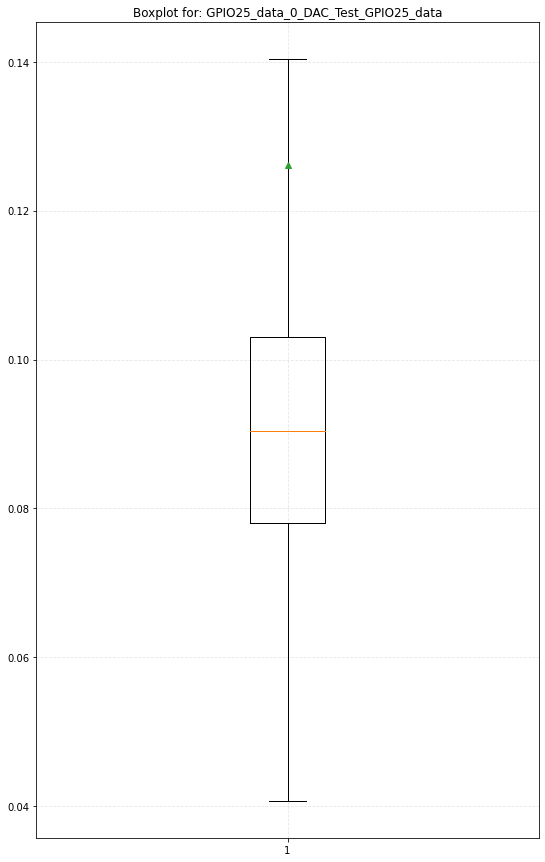

In [31]:
plt.figure(figsize=(9,15))
plt.title("Boxplot for: " + a_test_res)

# 如果需要显示异常值则设置  showfliers = Ture
box1 = pd.Series({a_test_res:hist_x_value})

labels = [a_test_res]
plt.boxplot(box1, showmeans=True, sym = '*', showfliers=False)

plt.grid(True, linestyle='--', alpha=0.3)


plt.show()

In [32]:
print("此测试项的统计数据:")
pd.Series(hist_x_value).describe()

此测试项的统计数据:


count    46795.000000
mean         0.126101
std          0.250089
min          0.035019
25%          0.078049
50%          0.090408
75%          0.102997
max          3.173676
dtype: float64